In [1]:
import os
import pandas as pd
import yfinance as yf

In [2]:
def download(ticker, start=None, end=None):
    if (start is None) and (end is None):
        return yf.Ticker(ticker).history(period="max")
    else:
        return yf.Ticker(ticker).history(start=start, end=end)

In [3]:
df = pd.DataFrame()
tickers = ['FB','AAPL','AMZN','NFLX','GOOG']
for ticker in tickers:
    df_ = download(ticker).rename(columns={'Close' : ticker})[[ticker]]
    df = df.join(df_, how='outer')  
df

,FB,AAPL,AMZN,NFLX,GOOG
Date,,,,,
1980-12-12,NaN,0.10,NaN,NaN,NaN
1980-12-15,NaN,0.10,NaN,NaN,NaN
1980-12-16,NaN,0.09,NaN,NaN,NaN
1980-12-17,NaN,0.09,NaN,NaN,NaN
1980-12-18,NaN,0.09,NaN,NaN,NaN
...,...,...,...,...,...
2020-12-30,271.87,133.72,3285.85,524.59,1739.52
2020-12-31,273.16,132.69,3256.93,540.73,1751.88
2021-01-04,268.94,129.41,3186.63,522.86,1728.24


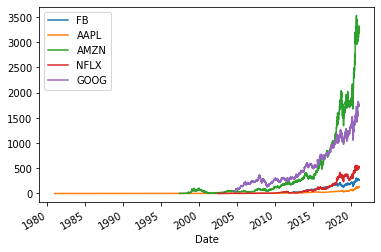

In [4]:
df.plot()

In [5]:
os.makedirs('../data/sp500', exist_ok=True)
tickers = ['FB','AAPL','AMZN','NFLX','GOOG']
for ticker in tickers:
    df = download(ticker)
    df.to_csv(f'../data/sp500/{ticker}.csv')

In [19]:
df = pd.DataFrame()
tickers = ['FB','AAPL','AMZN','NFLX','GOOG']
for ticker in tickers:
    df_ = pd.read_csv(f'../data/sp500/{ticker}.csv', parse_dates=True)
    df_ = df_.set_index('Date')
    df_ = df_[['Close']].rename(columns={'Close':ticker})
    df_ = df_.loc['2020-01-01':'2020-12-31',:]
    df = df.join(df_, how='outer')
df = df / df.iloc[0,:] * 100
df 

,FB,AAPL,AMZN,NFLX,GOOG
Date,,,,,
2020-01-02,100.000000,100.000000,100.000000,100.000000,100.000000
2020-01-03,99.470874,99.032778,98.786097,98.814469,99.509277
2020-01-06,101.344265,99.825363,100.256585,101.825293,101.962892
2020-01-07,101.563543,99.355185,100.466278,100.285013,101.899266
2020-01-08,102.593193,100.953788,99.681772,102.865286,102.702268
...,...,...,...,...,...
2020-12-24,127.466870,177.283718,167.158761,155.838210,127.167482
2020-12-28,132.043093,183.624395,173.021217,157.399715,129.890959
2020-12-29,131.938221,181.179473,175.025421,160.962372,128.620637


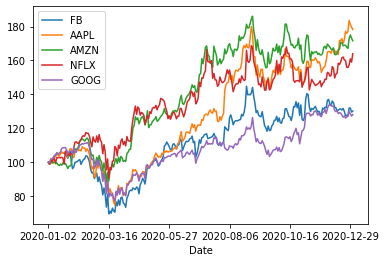

In [20]:
df.plot()